<a href="https://colab.research.google.com/github/pyohamen/yonsei/blob/master/2-2_%EC%9D%98%EC%82%AC%EA%B2%B0%EC%A0%95%EB%82%98%EB%AC%B4%20%EB%B0%8F%20%EB%AA%A8%ED%98%95%EB%B9%84%EA%B5%90%20%EA%B3%BC%EC%A0%9C/%EC%9D%98%EC%82%AC%EA%B2%B0%EC%A0%95%EB%82%98%EB%AC%B4%20%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 불러오기

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('Default.csv')

In [ ]:
data.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [ ]:
data.isnull().sum()

default    0
student    0
balance    0
income     0
dtype: int64

In [ ]:
data = pd.get_dummies(data, columns=['default', 'student'], drop_first=True) # Yes=1 / No=0

In [ ]:
data = data.rename({'default_Yes':'default', 'student_Yes':'student'}, axis=1)

In [ ]:
data.head()

,balance,income,default,student
0,729.526495,44361.625074,0,0
1,817.180407,12106.134700,0,1
2,1073.549164,31767.138947,0,0
3,529.250605,35704.493935,0,0
4,785.655883,38463.495879,0,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

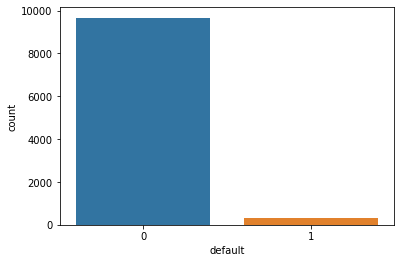

In [ ]:
sns.countplot(x='default', data=data)
plt.show()

In [ ]:
X = data.drop(['default'], axis=1)
y = data['default']

## 1. Default 데이터를 Train 데이터와 Test 데이터로 분할 하시오.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y, random_state=0)

In [ ]:
print('Train 데이터:', X_train.shape[0], '| Test 데이터:', X_test.shape[0])

Train 데이터: 6700 | Test 데이터: 3300


## 2. Train 데이터를 사용하여 옵션을 사용하지 않은 Default Tree를 적합 하시오.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree1 = DecisionTreeClassifier(random_state=0)

In [ ]:
tree1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

## 3. Hyper-Parameter Tuning을 통해 Best Tree를 적합 하시오.

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV

In [ ]:
np.random.seed(0)
g_cv = GridSearchCV(DecisionTreeClassifier(random_state=0),
                   param_grid = {'ccp_alpha' : np.arange(0, 0.005, 0.0001),
                                'min_impurity_decrease' : np.arange(0, 0.003, 0.0005),
                                'min_samples_split' : np.arange(800, 1200, 200)},
                   cv=10)
g_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'ccp_alpha': array([0.    , 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007,
       0.0008, 0.0009, 0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015,
       0.0016, 0.0017, 0.0018, 0.0019, 0.002 , 0.0021, 0.0022, 0.0023,
       0.0024, 0.0025, 0.0026, 0.0027, 0.0028, 0.0029, 0.003 , 0.0031,
       0.0032, 0.0033, 0.0034, 0.0035, 0.0036, 0.0037, 0.0038, 0.0039,
       0.004 , 0.0041, 0.0042, 0.0043, 0.0044, 0.0045, 0.0046, 0.0047,
       0.0048, 0.0049]),
                         'min_impurity_decrease': array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025]),
                         'min_samples_split': array([ 800, 1000])})

In [ ]:
print('Best Parameters:', g_cv.best_params_)

Best Parameters: {'ccp_alpha': 0.0, 'min_impurity_decrease': 0.0005, 'min_samples_split': 800}


In [ ]:
tree2 = DecisionTreeClassifier(ccp_alpha=0, min_impurity_decrease=0.005, min_samples_split=800, random_state=0)

In [ ]:
tree2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0, min_impurity_decrease=0.005,
                       min_samples_split=800, random_state=0)

## 4. Default Tree와 Best Tree의 성능을 ROC 곡선을 이용하여 비교 하시오.

In [ ]:
from sklearn.metrics import plot_roc_curve

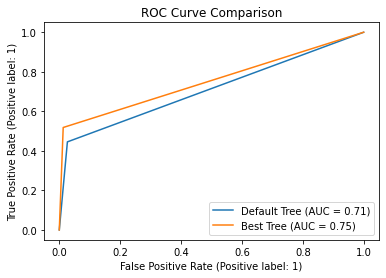

In [ ]:
fig, ax = plt.subplots()
plot_roc_curve(tree1, X_test, y_test, name='Default Tree', ax=ax)
plot_roc_curve(tree2, X_test, y_test, name='Best Tree', ax=ax)
ax.set_title('ROC Curve Comparison')
plt.show()

## 5. (model).feature_importances_ 명령어를 사용하여 두 의사결정나무의 변수 중요도를 비교 하시오.

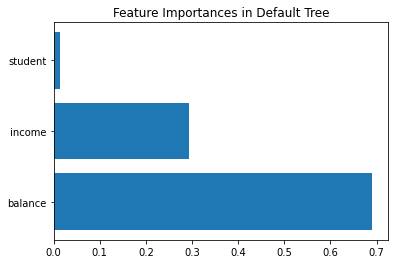

In [ ]:
fig, ax = plt.subplots()
ax.barh(X.columns, tree1.feature_importances_)
ax.set_title('Feature Importances in Default Tree')
plt.show()

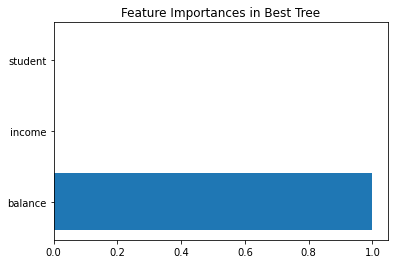

In [ ]:
fig, ax = plt.subplots()
ax.barh(X.columns, tree2.feature_importances_)
ax.set_title('Feature Importances in Best Tree')
plt.show()